## IMPORTING AND INITIALIZING SPARK

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when,isnan, col, count, mean, stddev, min, max, skewness, kurtosis

spark = SparkSession.builder.appName("MyApp").getOrCreate()

In [4]:
sales = spark.read.csv("DataSet_final/FactInternetSales.csv",  header=True, inferSchema=True)


customers = spark.read.csv("DataSet_final/DimCustomer.csv",header=True,inferSchema=True)

In [5]:
sales.printSchema()

root
 |-- ProductKey: integer (nullable = true)
 |-- OrderDateKey: integer (nullable = true)
 |-- DueDateKey: integer (nullable = true)
 |-- ShipDateKey: integer (nullable = true)
 |-- CustomerKey: integer (nullable = true)
 |-- PromotionKey: integer (nullable = true)
 |-- CurrencyKey: integer (nullable = true)
 |-- SalesTerritoryKey: integer (nullable = true)
 |-- SalesOrderNumber: string (nullable = true)
 |-- SalesOrderLineNumber: integer (nullable = true)
 |-- RevisionNumber: integer (nullable = true)
 |-- OrderQuantity: integer (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- ExtendedAmount: double (nullable = true)
 |-- UnitPriceDiscountPct: integer (nullable = true)
 |-- DiscountAmount: integer (nullable = true)
 |-- ProductStandardCost: double (nullable = true)
 |-- TotalProductCost: double (nullable = true)
 |-- SalesAmount: double (nullable = true)
 |-- TaxAmt: double (nullable = true)
 |-- Freight: double (nullable = true)
 |-- CarrierTrackingNumber: string (n

In [6]:
customers.printSchema()

root
 |-- CustomerKey: integer (nullable = true)
 |-- GeographyKey: integer (nullable = true)
 |-- CustomerAlternateKey: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- FirstName: string (nullable = true)
 |-- MiddleName: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- NameStyle: boolean (nullable = true)
 |-- BirthDate: date (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- Suffix: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- EmailAddress: string (nullable = true)
 |-- YearlyIncome: integer (nullable = true)
 |-- TotalChildren: integer (nullable = true)
 |-- NumberChildrenAtHome: integer (nullable = true)
 |-- EnglishEducation: string (nullable = true)
 |-- SpanishEducation: string (nullable = true)
 |-- FrenchEducation: string (nullable = true)
 |-- EnglishOccupation: string (nullable = true)
 |-- SpanishOccupation: string (nullable = true)
 |-- FrenchOccupation: string (nullable = true)
 |-- HouseOwner

In [7]:
sales.show(5)

+----------+------------+----------+-----------+-----------+------------+-----------+-----------------+----------------+--------------------+--------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+---------------------+----------------+-------------------+-------------------+-------------------+
|ProductKey|OrderDateKey|DueDateKey|ShipDateKey|CustomerKey|PromotionKey|CurrencyKey|SalesTerritoryKey|SalesOrderNumber|SalesOrderLineNumber|RevisionNumber|OrderQuantity|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|  TaxAmt|Freight|CarrierTrackingNumber|CustomerPONumber|          OrderDate|            DueDate|           ShipDate|
+----------+------------+----------+-----------+-----------+------------+-----------+-----------------+----------------+--------------------+--------------+-------------+---------+--------------+-----------

In [8]:
customers.show(5)

+-----------+------------+--------------------+-----+---------+----------+--------+---------+----------+-------------+------+------+--------------------+------------+-------------+--------------------+----------------+----------------+---------------+-----------------+-----------------+----------------+--------------+---------------+-------------------+------------+-------------------+-----------------+---------------+
|CustomerKey|GeographyKey|CustomerAlternateKey|Title|FirstName|MiddleName|LastName|NameStyle| BirthDate|MaritalStatus|Suffix|Gender|        EmailAddress|YearlyIncome|TotalChildren|NumberChildrenAtHome|EnglishEducation|SpanishEducation|FrenchEducation|EnglishOccupation|SpanishOccupation|FrenchOccupation|HouseOwnerFlag|NumberCarsOwned|       AddressLine1|AddressLine2|              Phone|DateFirstPurchase|CommuteDistance|
+-----------+------------+--------------------+-----+---------+----------+--------+---------+----------+-------------+------+------+--------------------+-

Let's get the shape of both tables (sales and customers)

In [9]:
print((sales.count(),len(sales.columns))  ,( customers.count(), len(customers.columns) ))

(60398, 26) (18484, 29)


## SALES DATA

In [10]:
sales.describe().show()

+-------+------------------+-------------------+-------------------+--------------------+------------------+------------------+-----------------+------------------+----------------+--------------------+--------------+-------------+-----------------+-----------------+--------------------+--------------+-------------------+-----------------+-----------------+------------------+------------------+---------------------+----------------+
|summary|        ProductKey|       OrderDateKey|         DueDateKey|         ShipDateKey|       CustomerKey|      PromotionKey|      CurrencyKey| SalesTerritoryKey|SalesOrderNumber|SalesOrderLineNumber|RevisionNumber|OrderQuantity|        UnitPrice|   ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost| TotalProductCost|      SalesAmount|            TaxAmt|           Freight|CarrierTrackingNumber|CustomerPONumber|
+-------+------------------+-------------------+-------------------+--------------------+------------------+------------------

In [11]:
distinct_products = sales.select("ProductKey").distinct().count()
average_quantity = sales.agg({"OrderQuantity": "avg"}).first()[0]

print("Distinct products: {}".format(distinct_products))
print("Average order quantity: {}".format(average_quantity))

Distinct products: 158
Average order quantity: 1.0


In [12]:
sales = sales.drop("CarrierTrackingNumber", "CustomerPONumber")

In [13]:
for col_name in sales.columns[:-3]:
  nan_count = sales.filter(isnan(col(col_name))).count()
  print(f"Column '{col_name}' has {nan_count} NaN values.")

Column 'ProductKey' has 0 NaN values.
Column 'OrderDateKey' has 0 NaN values.
Column 'DueDateKey' has 0 NaN values.
Column 'ShipDateKey' has 0 NaN values.
Column 'CustomerKey' has 0 NaN values.
Column 'PromotionKey' has 0 NaN values.
Column 'CurrencyKey' has 0 NaN values.
Column 'SalesTerritoryKey' has 0 NaN values.
Column 'SalesOrderNumber' has 0 NaN values.
Column 'SalesOrderLineNumber' has 0 NaN values.
Column 'RevisionNumber' has 0 NaN values.
Column 'OrderQuantity' has 0 NaN values.
Column 'UnitPrice' has 0 NaN values.
Column 'ExtendedAmount' has 0 NaN values.
Column 'UnitPriceDiscountPct' has 0 NaN values.
Column 'DiscountAmount' has 0 NaN values.
Column 'ProductStandardCost' has 0 NaN values.
Column 'TotalProductCost' has 0 NaN values.
Column 'SalesAmount' has 0 NaN values.
Column 'TaxAmt' has 0 NaN values.
Column 'Freight' has 0 NaN values.


array([[<Axes: title={'center': 'TotalProductCost'}>]], dtype=object)

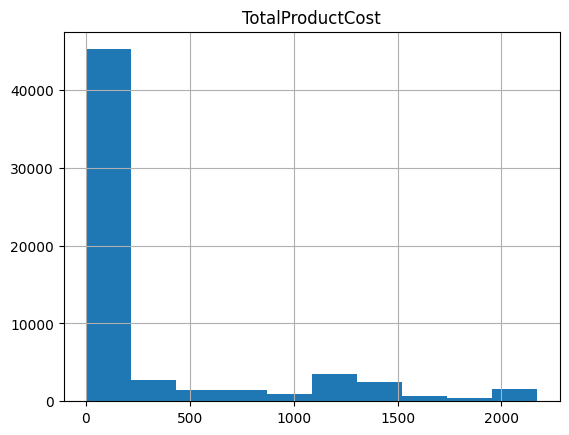

In [14]:
sales.toPandas().hist("TotalProductCost")

array([[<Axes: title={'center': 'SalesAmount'}>]], dtype=object)

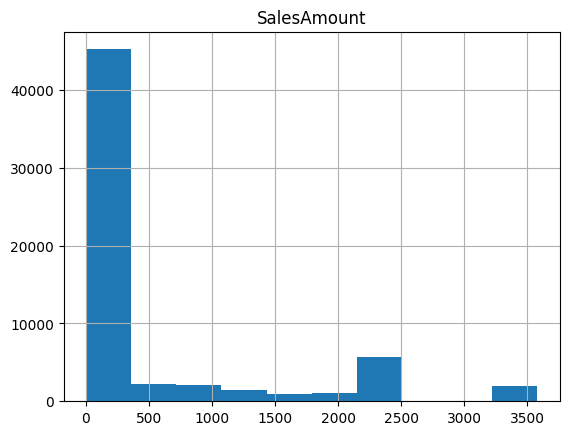

In [15]:
sales.toPandas().hist("SalesAmount")

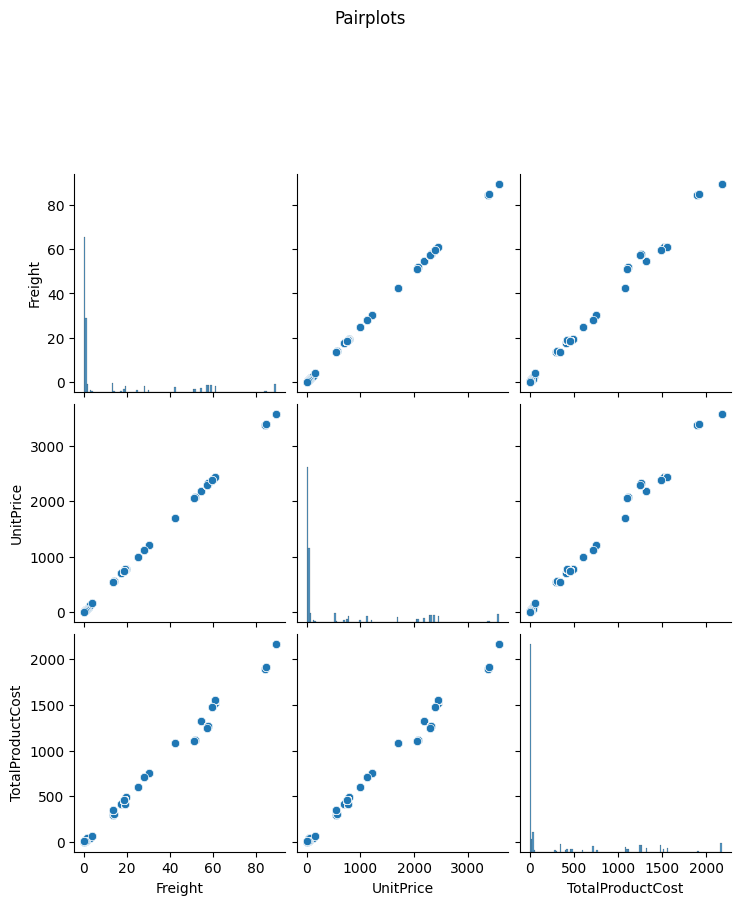

In [62]:

import seaborn as sns
import matplotlib.pyplot as plt
selected_columns = ['Freight', 'UnitPrice', 'TotalProductCost']
sns.pairplot(sales.toPandas()[selected_columns])
plt.suptitle('Pairplots', y=1.2)
plt.show()

<ipython-input-17-61dae4333b46>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales.toPandas().corr(),


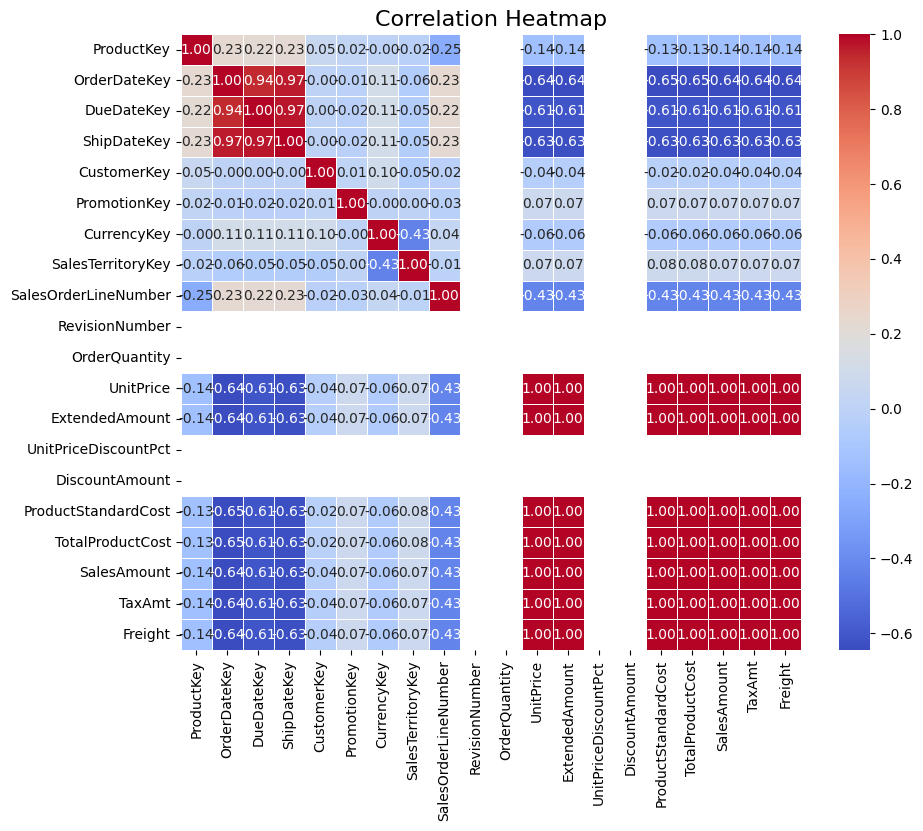

In [17]:
plt.figure(figsize=(10, 8))


sns.heatmap(sales.toPandas().corr(),
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5,
            )


plt.title('Correlation Heatmap', fontsize=16)

plt.show()

Removing the Constant columns

In [18]:
sales = sales.drop(
"RevisionNumber",
"OrderQuantity",
"DiscountAmount",
"UnitPriceDiscountPct",
)

## CUSTOMERS DATA

In [19]:
customers.describe().show()

+-------+-----------------+------------------+--------------------+-----+---------+----------+--------+-------------+------+------+--------------------+------------------+------------------+--------------------+-------------------+--------------------+---------------+-----------------+-----------------+----------------+-------------------+------------------+--------------------+-----------------+-------------------+---------------+
|summary|      CustomerKey|      GeographyKey|CustomerAlternateKey|Title|FirstName|MiddleName|LastName|MaritalStatus|Suffix|Gender|        EmailAddress|      YearlyIncome|     TotalChildren|NumberChildrenAtHome|   EnglishEducation|    SpanishEducation|FrenchEducation|EnglishOccupation|SpanishOccupation|FrenchOccupation|     HouseOwnerFlag|   NumberCarsOwned|        AddressLine1|     AddressLine2|              Phone|CommuteDistance|
+-------+-----------------+------------------+--------------------+-----+---------+----------+--------+-------------+------+----

<Axes: xlabel='Gender', ylabel='count'>

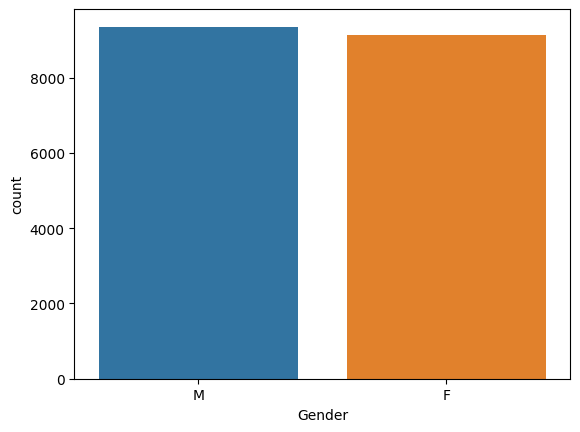

In [23]:
cus_df = customers.toPandas()
sns.countplot(data = cus_df , x="Gender")

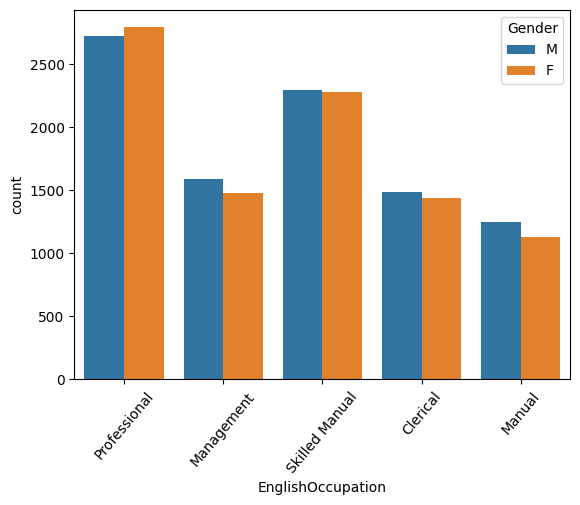

In [27]:
sns.countplot(data = cus_df , x="EnglishOccupation" , hue = "Gender" )
plt.xticks(rotation= 50)
plt.show()

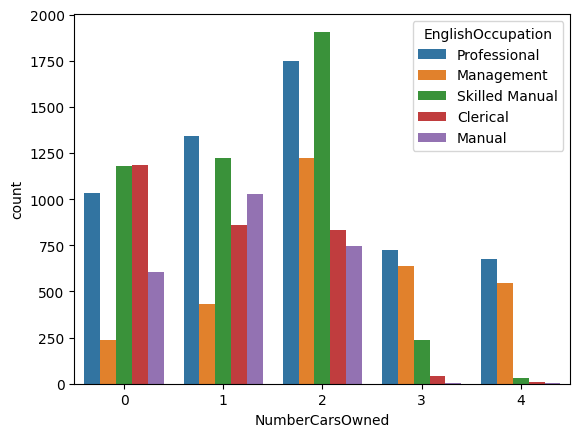

In [33]:
sns.countplot(data = cus_df , x="NumberCarsOwned" , hue= "EnglishOccupation" )
plt.xticks(rotation= 0)
plt.show()

<Axes: xlabel='YearlyIncome', ylabel='Count'>

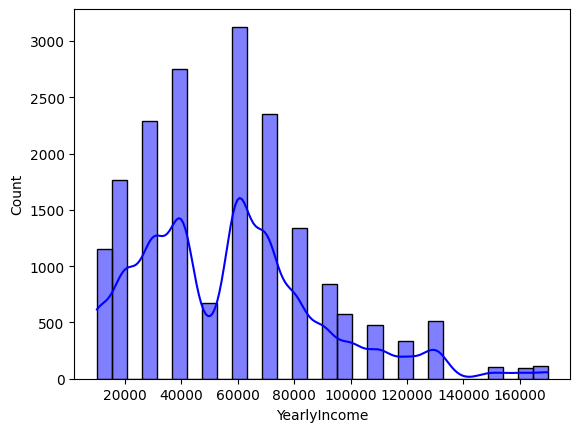

In [34]:
sns.histplot(data = cus_df, bins=30,x="YearlyIncome", kde=True, color='blue', edgecolor='black')

<Axes: xlabel='CommuteDistance', ylabel='count'>

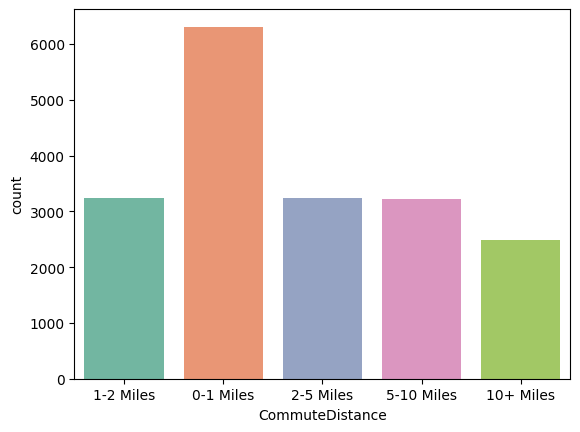

In [52]:
sns.countplot(x="CommuteDistance" ,  data = cus_df,  palette="Set2")

<Axes: xlabel='CommuteDistance', ylabel='count'>

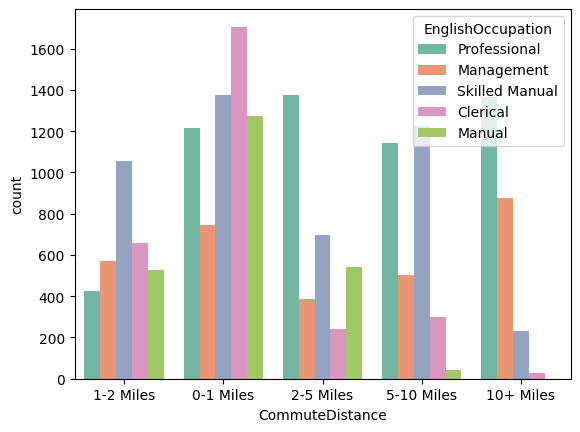

In [53]:
sns.countplot(x="CommuteDistance" ,hue="EnglishOccupation" ,  data = cus_df,  palette="Set2")

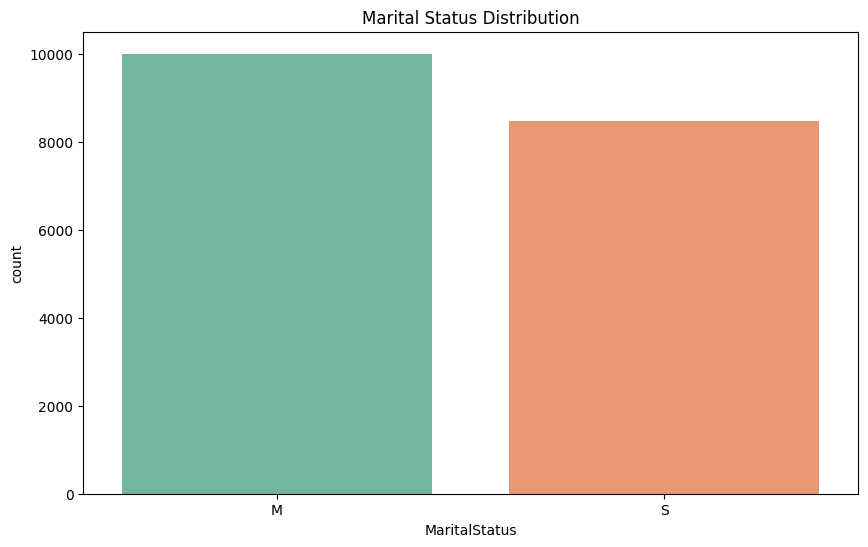

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x="MaritalStatus", data=cus_df, palette="Set2")
plt.title("Marital Status Distribution")
plt.show()

<Axes: xlabel='MaritalStatus', ylabel='HouseOwnerFlag'>

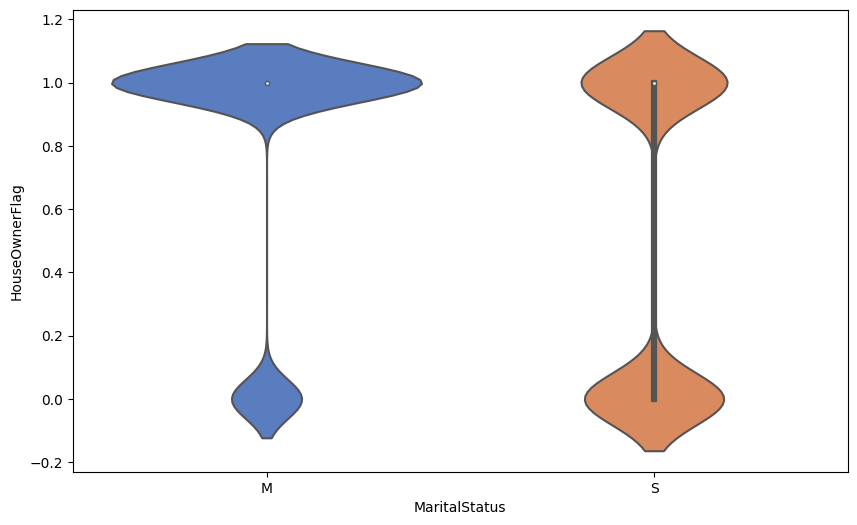

In [57]:
plt.figure(figsize=(10, 6))
sns.violinplot(y="HouseOwnerFlag",x="MaritalStatus", data=cus_df, palette="muted")

<Axes: >

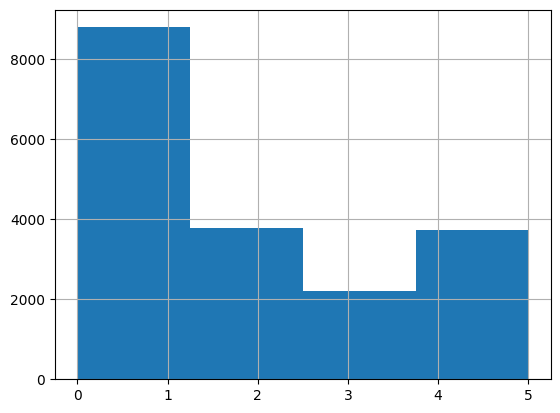

In [64]:
cus_df.TotalChildren.hist(bins=4)

<Axes: >

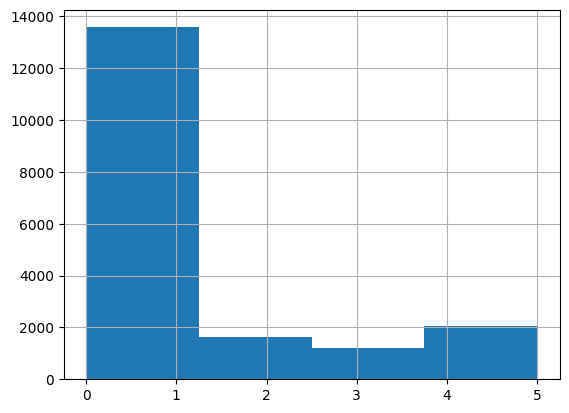

In [66]:
cus_df.NumberChildrenAtHome.hist(bins=4)

## MERGING BOTH DATASETS (SALES + CUSTOMERS)

In [59]:
df = sales.join(customers, on="CustomerKey", how="inner")

In [60]:
df.show()

+-----------+----------+------------+----------+-----------+------------+-----------+-----------------+----------------+--------------------+---------+--------------+-------------------+----------------+-----------+--------+-------+-------------------+-------------------+-------------------+------------+--------------------+-----+---------+----------+---------+---------+----------+-------------+------+------+--------------------+------------+-------------+--------------------+-------------------+--------------------+---------------+-----------------+--------------------+----------------+--------------+---------------+--------------------+------------+-------------------+-----------------+---------------+
|CustomerKey|ProductKey|OrderDateKey|DueDateKey|ShipDateKey|PromotionKey|CurrencyKey|SalesTerritoryKey|SalesOrderNumber|SalesOrderLineNumber|UnitPrice|ExtendedAmount|ProductStandardCost|TotalProductCost|SalesAmount|  TaxAmt|Freight|          OrderDate|            DueDate|           Shi